In [90]:
import os
import pandas as pd 
import numpy as np 
from typing import Dict, List, Tuple 
import sqlite3
import json
import glob
from datetime import datetime
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
con = sqlite3.connect('database.db')

In [5]:
query = '''
    SELECT *
    FROM KLM_tweets
'''
df_datas = pd.read_sql_query(query, con)
df_datas

,,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,filter_level,lang,timestamp_ms,retweeted_status,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,delete
0,36,2019-05-22 12:23:03+00:00,1.1311736252588155e+18,1.1311736252588155e+18,@Pelusitaaaa1 Hoi! Enkel KLM/Air France-vluch...,"[14, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.1311713636733174e+18,1.1311713636733174e+18,...,low,nl,2019-05-22 12:23:03.108,None,{'full_text': '@Pelusitaaaa1 Hoi! Enkel KLM/A...,None,None,None,None,None
1,635,2019-05-22 13:09:16+00:00,1.1311852592892068e+18,1.1311852592892068e+18,@Pelusitaaaa1 We helpen je graag. Kan je ons e...,"[14, 107]","<a href=""http://www.salesforce.com"" rel=""nofol...",0.0,1.1311830432412303e+18,1.1311830432412303e+18,...,low,nl,2019-05-22 13:09:16.877,None,None,None,None,None,None,None
2,785,2019-05-22 13:20:05+00:00,1.1311879787710259e+18,1.1311879787710259e+18,@addblackman We understand that you would pref...,"[13, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.1311824743804232e+18,1.1311824743804232e+18,...,low,en,2019-05-22 13:20:05.252,None,{'full_text': '@addblackman We understand that...,None,None,None,None,None
3,788,2019-05-22 13:20:17+00:00,1.1311880285281075e+18,1.1311880285281075e+18,@CarlosMosig Con el fin de evitar errores noso...,"[13, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.1311830804741243e+18,1.1311830804741243e+18,...,low,es,2019-05-22 13:20:17.115,None,{'full_text': '@CarlosMosig Con el fin de evit...,None,None,None,None,None
4,791,2019-05-22 13:20:31+00:00,1.1311880893287342e+18,1.1311880893287342e+18,@addblackman We do understand that some passen...,"[13, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.1311824743804232e+18,1.1311824743804232e+18,...,low,en,2019-05-22 13:20:31.611,None,{'full_text': '@addblackman We do understand t...,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,255060,2019-06-02 08:21:07+00:00,1.1350990102205153e+18,1.1350990102205153e+18,Â¡Ya vamos para Calella para hacer la activida...,"[0, 113]","<a href=""http://twitter.com/download/android"" ...",0.0,None,None,...,low,es,2019-06-02 08:21:07.813,None,None,None,None,None,None,None
5887,255069,2019-06-02 08:22:08+00:00,1.1350992654395269e+18,1.1350992654395269e+18,Home of Royal Dutch Airlines @KLM,None,"<a href=""http://twitter.com/download/iphone"" r...",0.0,None,None,...,low,en,2019-06-02 08:22:08.662,None,None,1.1350281383693804e+18,1.1350281383693804e+18,{'created_at': 'Sun Jun 02 03:39:30 +0000 2019...,"{'url': 'https://t.co/8zNNCLs3lD', 'expanded':...",None
5888,255088,2019-06-02 08:23:55+00:00,1.1350997114997883e+18,1.1350997114997883e+18,@kjwoerkom @luchtvaart @KLM @tudelft Hij vlieg...,"[37, 128]","<a href=""http://twitter.com/download/iphone"" r...",0.0,1.1350723863555891e+18,1.1350723863555891e+18,...,low,nl,2019-06-02 08:23:55.011,None,None,None,None,None,None,None
5889,255096,2019-06-02 08:24:26+00:00,1.1350998439097713e+18,1.1350998439097713e+18,RT @SpaethFlies: V-shaped Flying Wing concept ...,None,"<a href=""http://twitter.com/download/iphone"" r...",0.0,None,None,...,low,en,2019-06-02 08:24:26.580,{'created_at': 'Sun Jun 02 08:06:30 +0000 2019...,None,None,None,None,None,None


In [64]:
#tweets mentioned KLM

ind2 = []
for index, row in df_datas.iterrows():
    if "@KLM" in row['text']:
        ind2.append(index)
klm_mention = df_datas.loc[ind2]
klm_mention

,,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,filter_level,lang,timestamp_ms,retweeted_status,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,delete
87,54,2019-05-22 12:24:26+00:00,1.1311739743421932e+18,1.1311739743421932e+18,RT @McWhirterAlex: .@KLM will fly Amsterdam-Ba...,None,"<a href=""http://twitter.com/download/iphone"" r...",0.0,None,None,...,low,en,2019-05-22 12:24:26.336,{'created_at': 'Wed May 22 11:49:14 +0000 2019...,None,None,None,None,None,None
88,55,2019-05-22 12:24:31+00:00,1.1311739963370988e+18,1.1311739963370988e+18,RT @Vinamralongani: @KLM to launch thrice week...,None,"<a href=""http://twitter.com/download/iphone"" r...",0.0,None,None,...,low,en,2019-05-22 12:24:31.580,{'created_at': 'Wed May 22 11:52:42 +0000 2019...,None,None,None,None,None,None
89,92,2019-05-22 12:27:15+00:00,1.131174682525352e+18,1.131174682525352e+18,@wolfmandanny @KLM Thanks Dan,"[19, 29]","<a href=""http://twitter.com/download/iphone"" r...",0.0,1.1311644991453676e+18,1.1311644991453676e+18,...,low,en,2019-05-22 12:27:15.180,None,None,None,None,None,None,None
90,173,2019-05-22 12:35:00+00:00,1.1311766324028129e+18,1.1311766324028129e+18,Waar @KLM de slots vandaan haalt is (nog) niet...,None,"<a href=""http://twitter.com/#!/download/ipad"" ...",0.0,None,None,...,low,nl,2019-05-22 12:35:00.067,None,None,1.1311597893486715e+18,1.1311597893486715e+18,{'created_at': 'Wed May 22 11:28:04 +0000 2019...,"{'url': 'https://t.co/GwwWYOYj61', 'expanded':...",None
91,204,2019-05-22 12:37:29+00:00,1.1311772609024369e+18,1.1311772609024369e+18,@KLM Aviation releases about 3% of human carbo...,"[5, 124]","<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,1.1116596754377523e+18,1.1116596754377523e+18,...,low,en,2019-05-22 12:37:29.913,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,255060,2019-06-02 08:21:07+00:00,1.1350990102205153e+18,1.1350990102205153e+18,Â¡Ya vamos para Calella para hacer la activida...,"[0, 113]","<a href=""http://twitter.com/download/android"" ...",0.0,None,None,...,low,es,2019-06-02 08:21:07.813,None,None,None,None,None,None,None
5887,255069,2019-06-02 08:22:08+00:00,1.1350992654395269e+18,1.1350992654395269e+18,Home of Royal Dutch Airlines @KLM,None,"<a href=""http://twitter.com/download/iphone"" r...",0.0,None,None,...,low,en,2019-06-02 08:22:08.662,None,None,1.1350281383693804e+18,1.1350281383693804e+18,{'created_at': 'Sun Jun 02 03:39:30 +0000 2019...,"{'url': 'https://t.co/8zNNCLs3lD', 'expanded':...",None
5888,255088,2019-06-02 08:23:55+00:00,1.1350997114997883e+18,1.1350997114997883e+18,@kjwoerkom @luchtvaart @KLM @tudelft Hij vlieg...,"[37, 128]","<a href=""http://twitter.com/download/iphone"" r...",0.0,1.1350723863555891e+18,1.1350723863555891e+18,...,low,nl,2019-06-02 08:23:55.011,None,None,None,None,None,None,None
5889,255096,2019-06-02 08:24:26+00:00,1.1350998439097713e+18,1.1350998439097713e+18,RT @SpaethFlies: V-shaped Flying Wing concept ...,None,"<a href=""http://twitter.com/download/iphone"" r...",0.0,None,None,...,low,en,2019-06-02 08:24:26.580,{'created_at': 'Sun Jun 02 08:06:30 +0000 2019...,None,None,None,None,None,None


In [37]:
#tweets replied by KLM
ind = []
for index, row in df_datas.iterrows():
    if "@KLM" not in row['text']:
        ind.append(index)
klm_tweet = df_datas.loc[ind]
klm_tweet

,,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,filter_level,lang,timestamp_ms,retweeted_status,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,delete
0,36,2019-05-22 12:23:03+00:00,1.1311736252588155e+18,1.1311736252588155e+18,@Pelusitaaaa1 Hoi! Enkel KLM/Air France-vluch...,"[14, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.1311713636733174e+18,1.1311713636733174e+18,...,low,nl,2019-05-22 12:23:03.108,None,{'full_text': '@Pelusitaaaa1 Hoi! Enkel KLM/A...,None,None,None,None,None
1,635,2019-05-22 13:09:16+00:00,1.1311852592892068e+18,1.1311852592892068e+18,@Pelusitaaaa1 We helpen je graag. Kan je ons e...,"[14, 107]","<a href=""http://www.salesforce.com"" rel=""nofol...",0.0,1.1311830432412303e+18,1.1311830432412303e+18,...,low,nl,2019-05-22 13:09:16.877,None,None,None,None,None,None,None
2,785,2019-05-22 13:20:05+00:00,1.1311879787710259e+18,1.1311879787710259e+18,@addblackman We understand that you would pref...,"[13, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.1311824743804232e+18,1.1311824743804232e+18,...,low,en,2019-05-22 13:20:05.252,None,{'full_text': '@addblackman We understand that...,None,None,None,None,None
3,788,2019-05-22 13:20:17+00:00,1.1311880285281075e+18,1.1311880285281075e+18,@CarlosMosig Con el fin de evitar errores noso...,"[13, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.1311830804741243e+18,1.1311830804741243e+18,...,low,es,2019-05-22 13:20:17.115,None,{'full_text': '@CarlosMosig Con el fin de evit...,None,None,None,None,None
4,791,2019-05-22 13:20:31+00:00,1.1311880893287342e+18,1.1311880893287342e+18,@addblackman We do understand that some passen...,"[13, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.1311824743804232e+18,1.1311824743804232e+18,...,low,en,2019-05-22 13:20:31.611,None,{'full_text': '@addblackman We do understand t...,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,254941,2019-06-02 08:11:31+00:00,1.135096594200748e+18,1.135096594200748e+18,@UreshaM There are items that may not be carri...,"[9, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.1350952359425393e+18,1.1350952359425393e+18,...,low,en,2019-06-02 08:11:31.789,None,{'full_text': '@UreshaM There are items that m...,None,None,None,None,None
1760,254956,2019-06-02 08:12:27+00:00,1.1350968290230723e+18,1.1350968290230723e+18,@SuzanneMedows Our sincere apologies for the d...,"[15, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.1350945810479063e+18,1.1350945810479063e+18,...,low,en,2019-06-02 08:12:27.775,None,{'full_text': '@SuzanneMedows Our sincere apol...,None,None,None,None,None
1761,254980,2019-06-02 08:14:57+00:00,1.1350974558534124e+18,1.1350974558534124e+18,@TimKro We would like to help you with reservi...,"[8, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.135095485369389e+18,1.135095485369389e+18,...,low,en,2019-06-02 08:14:57.223,None,{'full_text': '@TimKro We would like to help y...,None,None,None,None,None
1762,255082,2019-06-02 08:23:32+00:00,1.1350996175515075e+18,1.1350996175515075e+18,@UreshaM The final check will still be done at...,"[9, 70]","<a href=""http://www.salesforce.com"" rel=""nofol...",0.0,1.1350975407460639e+18,1.1350975407460639e+18,...,low,en,2019-06-02 08:23:32.612,None,None,None,None,None,None,None


In [41]:
klm_tweet2 = klm_tweet[['created_at']]
klm_tweet2['quantity'] = 1
klm_tweet2['created_at'] = pd.to_datetime(klm_tweet2['created_at'])
klm_series = klm_tweet2.resample('H', on='created_at').quantity.sum()
klm_series

<ipython-input-41-1edc99257a1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klm_tweet2['quantity'] = 1
<ipython-input-41-1edc99257a1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klm_tweet2['created_at'] = pd.to_datetime(klm_tweet2['created_at'])


created_at
2019-05-22 12:00:00+00:00     3
2019-05-22 13:00:00+00:00    27
2019-05-22 14:00:00+00:00    15
2019-05-22 15:00:00+00:00     9
2019-05-22 16:00:00+00:00     0
                             ..
2019-06-02 04:00:00+00:00     1
2019-06-02 05:00:00+00:00     0
2019-06-02 06:00:00+00:00     2
2019-06-02 07:00:00+00:00     8
2019-06-02 08:00:00+00:00     6
Freq: H, Name: quantity, Length: 261, dtype: int64

In [49]:
klm_series = klm_series.groupby(klm_series.index.hour).mean()
klm_series

created_at
0     1.545455
1     1.272727
2     2.090909
3     1.454545
4     3.181818
5     3.181818
6     6.545455
7     5.090909
8     5.636364
9     8.100000
10    8.100000
11    8.500000
12    4.636364
13    7.363636
14    4.909091
15    4.090909
16    5.000000
17    4.454545
18    5.000000
19    5.454545
20    8.363636
21    6.363636
22    4.272727
23    2.363636
Name: quantity, dtype: float64

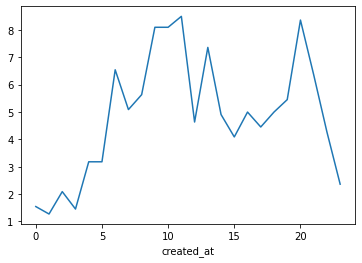

In [50]:
klm_series.plot(kind='line');

In [29]:
klm_mention2 = klm_mention[['created_at']]
klm_mention2['quantity'] = 1
klm_mention2['created_at'] = pd.to_datetime(klm_mention2['created_at'])
klm_mention_series = klm_mention2.resample('H', on='created_at').quantity.sum()
klm_mention_series

<ipython-input-29-f1d96ef7d834>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klm_mention2['quantity'] = 1
<ipython-input-29-f1d96ef7d834>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klm_mention2['created_at'] = pd.to_datetime(klm_mention2['created_at'])


created_at
2019-05-22 12:00:00+00:00    54
2019-05-22 13:00:00+00:00    63
2019-05-22 14:00:00+00:00    87
2019-05-22 15:00:00+00:00    51
2019-05-22 16:00:00+00:00    24
                             ..
2019-06-02 04:00:00+00:00     1
2019-06-02 05:00:00+00:00    10
2019-06-02 06:00:00+00:00    26
2019-06-02 07:00:00+00:00    29
2019-06-02 08:00:00+00:00    19
Freq: H, Name: quantity, Length: 261, dtype: int64

In [54]:
#Average number of Tweets mentioned KLM per hour of the day
#klm_mention_series = klm_mention_series.groupby(klm_mention_series.index.hour).mean()
klm_mention_series

created_at
0      4.545455
1      4.181818
2      3.636364
3      4.818182
4      6.454545
5     12.181818
6     18.000000
7     19.272727
8     19.181818
9     25.300000
10    26.300000
11    25.900000
12    23.272727
13    27.636364
14    24.363636
15    21.272727
16    22.090909
17    21.727273
18    30.727273
19    27.909091
20    22.818182
21    17.545455
22    12.818182
23     5.909091
Name: quantity, dtype: float64

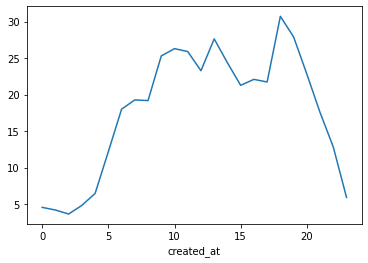

In [56]:
klm_mention_series.plot(kind='line');

In [57]:
query2 = '''
    SELECT *
    FROM british_airways_tweets
'''
df_datas2 = pd.read_sql_query(query2, con)
df_datas2

,,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,filter_level,lang,timestamp_ms,retweeted_status,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,delete
0,22,2019-05-22 12:21:58+00:00,1.1311733532917678e+18,1.1311733532917678e+18,@journoian We appreciate your feedback and we'...,"[11, 140]","<a href=""http://www.conversocial.com"" rel=""nof...",0.0,1.1311127830120735e+18,1.1311127830120735e+18,...,low,en,2019-05-22 12:21:58.266,None,None,None,None,None,None,None
1,28,2019-05-22 12:22:25+00:00,1.131173469339693e+18,1.131173469339693e+18,@Shakal97883287 Oh no! Please can you drop us ...,"[16, 102]","<a href=""http://www.conversocial.com"" rel=""nof...",0.0,1.1309390004103004e+18,1.1309390004103004e+18,...,low,en,2019-05-22 12:22:25.934,None,None,None,None,None,None,None
2,39,2019-05-22 12:23:11+00:00,1.1311736605328384e+18,1.1311736605328384e+18,@wineandthelaw We're concerned to hear this. C...,"[15, 102]","<a href=""http://www.conversocial.com"" rel=""nof...",0.0,1.1311716830569349e+18,1.1311716830569349e+18,...,low,en,2019-05-22 12:23:11.518,None,None,None,None,None,None,None
3,40,2019-05-22 12:23:12+00:00,1.1311736637456835e+18,1.1311736637456835e+18,"@wags9000 This is concerning to hear, Ally. Di...","[10, 125]","<a href=""http://www.conversocial.com"" rel=""nof...",0.0,1.1311294342437806e+18,1.1311294342437806e+18,...,low,en,2019-05-22 12:23:12.284,None,None,None,None,None,None,None
4,76,2019-05-22 12:26:10+00:00,1.1311744114348892e+18,1.1311744114348892e+18,@FantuttiFruity Send us your booking reference...,"[16, 140]","<a href=""http://www.conversocial.com"" rel=""nof...",1.0,1.1311666369779384e+18,1.1311666369779384e+18,...,low,en,2019-05-22 12:26:10.547,None,"{'full_text': ""@FantuttiFruity Send us your bo...",None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19603,255068,2019-06-02 08:22:03+00:00,1.1350992425975726e+18,1.1350992425975726e+18,RT @johnskelleher: My Friday flight was cancel...,None,"<a href=""https://claimcompanies.com"" rel=""nofo...",0.0,None,None,...,low,en,2019-06-02 08:22:03.216,{'created_at': 'Sun Jun 02 08:17:36 +0000 2019...,None,None,None,None,None,None
19604,255089,2019-06-02 08:23:57+00:00,1.1350997217126932e+18,1.1350997217126932e+18,@British_Airways Is there no way of checking f...,"[17, 140]","<a href=""http://twitter.com/download/iphone"" r...",1.0,1.1350982361574646e+18,1.1350982361574646e+18,...,low,en,2019-06-02 08:23:57.446,None,{'full_text': '@British_Airways Is there no wa...,None,None,None,None,None
19605,255095,2019-06-02 08:24:26+00:00,1.13509984377967e+18,1.13509984377967e+18,@EdHayne @British_Airways @EnglandRugby NFI,"[40, 43]","<a href=""http://twitter.com/download/iphone"" r...",0.0,1.1350926951631831e+18,1.1350926951631831e+18,...,low,und,2019-06-02 08:24:26.549,None,None,None,None,None,None,None
19606,255113,2019-06-02 08:26:25+00:00,1.1351003443027558e+18,1.1351003443027558e+18,@British_Airways Thatâ€™s very disappointing a...,"[17, 140]","<a href=""http://twitter.com/download/iphone"" r...",1.0,1.1349461305869435e+18,1.1349461305869435e+18,...,low,en,2019-06-02 08:26:25.883,None,{'full_text': '@British_Airways Thatâ€™s very ...,None,None,None,None,None


In [62]:
#tweets by British airways 

ind = []
for index, row in df_datas2.iterrows():
    if "@British_Airways" not in row['text']:
        ind.append(index)
british_tweet = df_datas2.loc[ind]
british_tweet = british_tweet[['created_at']]
british_tweet['quantity'] = 1
british_tweet

,created_at,quantity
0,2019-05-22 12:21:58+00:00,1
1,2019-05-22 12:22:25+00:00,1
2,2019-05-22 12:23:11+00:00,1
3,2019-05-22 12:23:12+00:00,1
4,2019-05-22 12:26:10+00:00,1
...,...,...
5288,2019-06-02 08:24:11+00:00,1
5289,2019-06-02 08:24:20+00:00,1
5290,2019-06-02 08:24:54+00:00,1
5291,2019-06-02 08:28:55+00:00,1


In [63]:
#tweets mentioned British airways
ind2 = []
for index, row in df_datas2.iterrows():
    if "@British_Airways" in row['text']:
        ind2.append(index)
british_tweet_men = df_datas2.loc[ind2]
british_tweet_men = british_tweet_men[['created_at']]
british_tweet_men['quantity'] = 1
british_tweet_men

,created_at,quantity
303,2019-05-23 10:33:46+00:00,1
326,2019-05-23 11:14:12+00:00,1
332,2019-05-23 11:28:57+00:00,1
343,2019-05-22 12:20:02+00:00,1
344,2019-05-22 12:20:36+00:00,1
...,...,...
19603,2019-06-02 08:22:03+00:00,1
19604,2019-06-02 08:23:57+00:00,1
19605,2019-06-02 08:24:26+00:00,1
19606,2019-06-02 08:26:25+00:00,1


In [72]:
british_tweet['created_at'] = pd.to_datetime(british_tweet['created_at'])
british_tweet_series = british_tweet.resample('H', on='created_at').quantity.sum()
bri_series = british_tweet_series.groupby(british_tweet_series.index.hour).mean()
bri_series

created_at
0      8.000000
1      5.363636
2      7.363636
3      5.000000
4      8.636364
5      9.272727
6     15.181818
7     18.181818
8     20.363636
9     21.900000
10    21.300000
11    20.200000
12    19.727273
13    17.818182
14    18.454545
15    17.727273
16    15.636364
17    15.000000
18    10.545455
19    11.090909
20    12.454545
21    11.636364
22    12.090909
23     9.363636
Name: quantity, dtype: float64

In [77]:
british_tweet_men['created_at'] = pd.to_datetime(british_tweet_men['created_at'])
british_mention_series = british_tweet_men.resample('H', on='created_at').quantity.sum()
bri_mention_series = british_mention_series.groupby(british_mention_series.index.hour).mean()
bri_mention_series

created_at
0      17.818182
1      20.272727
2      17.181818
3      15.272727
4      14.909091
5      24.272727
6      43.818182
7      56.636364
8      63.272727
9      76.400000
10    114.900000
11    120.600000
12    101.454545
13    120.909091
14    102.454545
15     86.454545
16     78.545455
17     67.545455
18     81.818182
19     75.909091
20     63.090909
21     58.636364
22     36.818182
23     25.363636
Name: quantity, dtype: float64

<AxesSubplot:xlabel='created_at'>

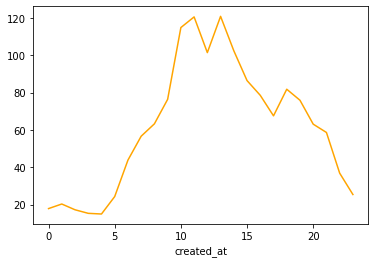

In [86]:
bri_mention_series.plot(c='orange')

<AxesSubplot:xlabel='created_at'>

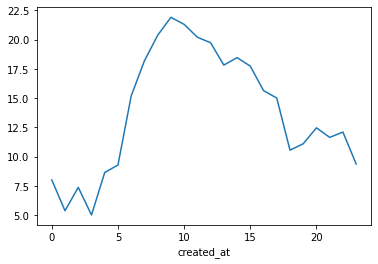

In [87]:
bri_series.plot()

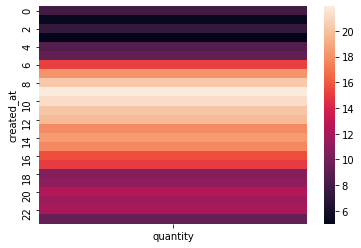

In [88]:
#ax = bri_series.plot();
df_bri = bri_series.to_frame()
heatmap = sns.heatmap(data=df_bri)
#bri_mention_series.plot(c='orange', ax=ax);

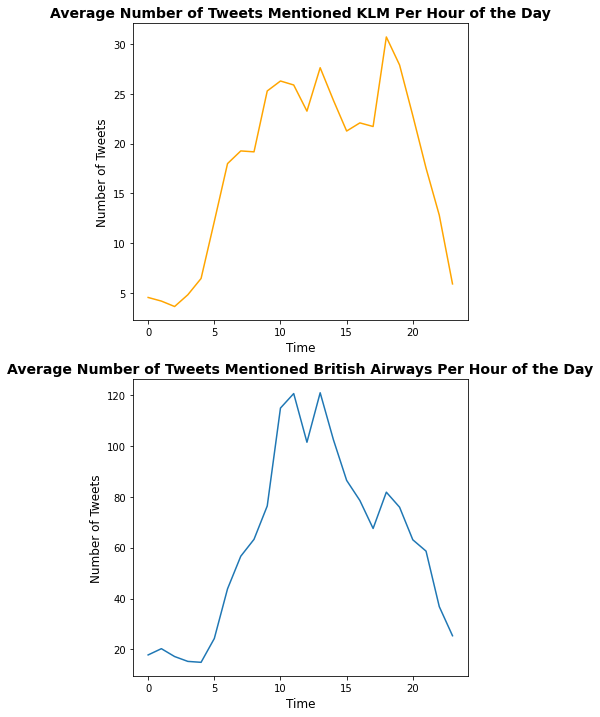

In [116]:
fig, ax = plt.subplots(nrows=2, ncols=1, squeeze=False, figsize=(6,12));
combine = klm_mention_series.plot(kind = 'line', c='orange', ax = ax[0,0])
bri_mention_series.plot(ax = ax[1,0]);
ax[0,0].set_xlabel('Time', size = 12)
ax[1,0].set_xlabel('Time', size = 12);
ax[0,0].set_ylabel('Number of Tweets', size = 12)
ax[1,0].set_ylabel('Number of Tweets', size = 12)
ax[0,0].set_title('Average Number of Tweets Mentioned KLM Per Hour of the Day', size = 14, weight = 'bold');
ax[1,0].set_title('Average Number of Tweets Mentioned British Airways Per Hour of the Day', size = 14, weight = 'bold');